<a href="https://colab.research.google.com/github/jaredwool/causal_modeling/blob/main/g_castle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gcastle==1.0.3
!pip install networkx==2.5

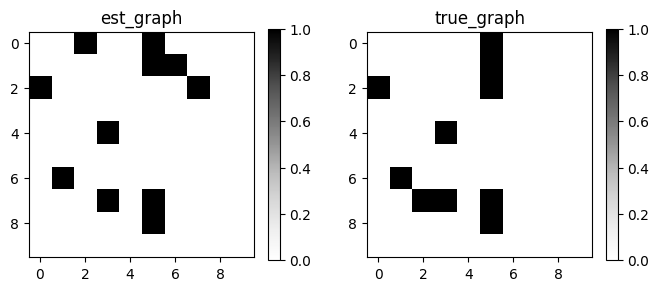

{'fdr': 0.1111, 'tpr': 0.8, 'fpr': 0.0286, 'shd': 2, 'nnz': 9, 'precision': 0.7273, 'recall': 0.8, 'F1': 0.7619, 'gscore': 0.5}


In [2]:
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG
from castle.algorithms import PC

# data simulation, simulate true causal dag and train_data.
weighted_random_dag = DAG.erdos_renyi(n_nodes=10, n_edges=10,
                                      weight_range=(0.5, 2.0), seed=1)
dataset = IIDSimulation(W=weighted_random_dag, n=2000, method='linear',
                        sem_type='gauss')
true_causal_matrix, X = dataset.B, dataset.X

# structure learning
pc = PC()
pc.learn(X)

# plot predict_dag and true_dag
GraphDAG(pc.causal_matrix, true_causal_matrix, 'result')

# calculate metrics
mt = MetricsDAG(pc.causal_matrix, true_causal_matrix)
print(mt.metrics)